# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [268]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/lab-regression-analysis/your-code/')

Mounted at /content/drive


In [269]:
from google.colab import files
# uploaded = files.upload()

In [270]:
import pandas as pd
import numpy as np

In [271]:
from matplotlib import pyplot as plt
from matplotlib import cm

In [272]:
import seaborn as sns

In [273]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [310]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [311]:
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

In [312]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [313]:
# seaborn plot configuration
sns.set_context('poster')
sns.set(rc={'figure.figsize': (10., 5.)})
sns.set_style('whitegrid')

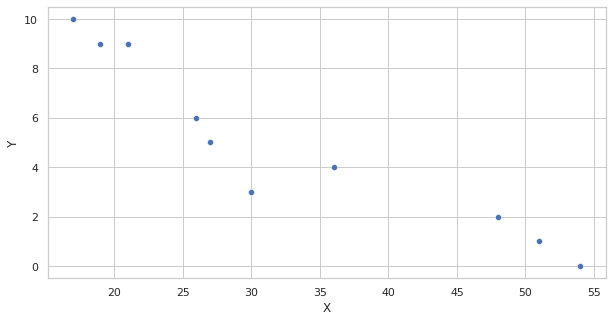

In [314]:
sns.scatterplot(x=student_data["X"], y=student_data["Y"])

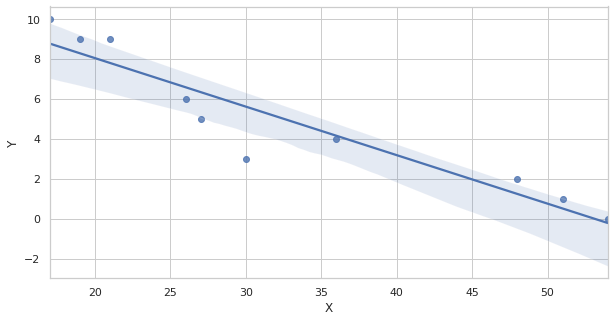

In [315]:
sns.regplot(x="X", y="Y", data=student_data)

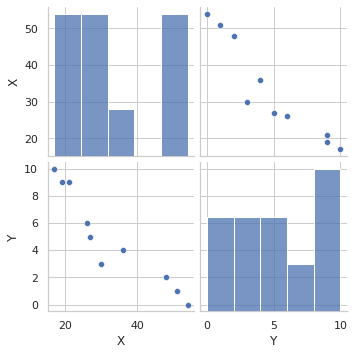

In [316]:
sns.pairplot(student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- The chart shows a negative downward trend, for the moment it supports the initial hypothesis. But we have to remember that the magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [317]:
# covariance
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


- Covariance indicates the level to which two variables vary together. The correlation between elements, is negative.


- Negative covariance values ​​indicate that values ​​above the average of one variable are associated with values ​​below the average of the other variable.


In [318]:
# correlation
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


- Having negative values ​​close to zero is total negative linear correlation.
The correlation of a variable with itself is 1, for that reason all the diagonal values are 1.00.

- The correlation coefficient is equal to the covariance divided by the product of the standard deviations of the variables. Therefore, a positive covariance will always produce a positive correlation and a negative covariance will always produce a negative correlation.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

- Linear regression with sklearn

In [320]:
lr = LinearRegression()

In [321]:
X_train1 = student_data[['X']]
y_train1 = student_data.Y  # defining outcome variable

In [322]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    X = X_train1,
    y = y_train1,
)
optimal_m = lr.coef_[0]
optimal_n = lr.intercept_

In [323]:
lr.coef_

array([-0.24282077])

In [253]:
optimal_m

-0.2428207709159809

In [254]:
optimal_n

12.888803363135771

In [328]:
# outcome variable
student_data["Predicted"] = lr.predict(X_train1)

In [329]:
student_data.head()

,X,Y,Predicted
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256


Plot your regression model on your scatter plot.

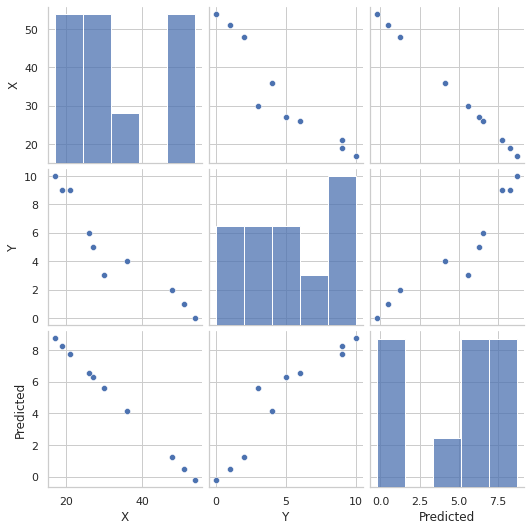

In [330]:
sns.pairplot(student_data)

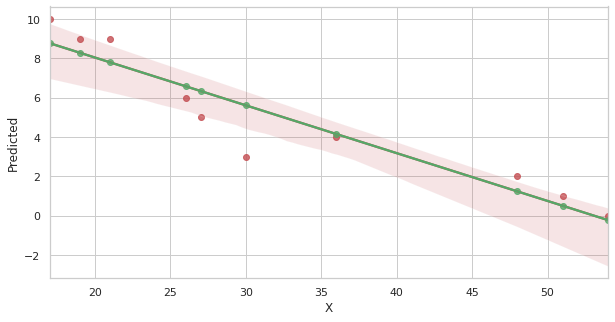

In [331]:
fig, ax = plt.subplots()
sns.regplot(x="X", y="Y", data=student_data,  color='r')
sns.regplot(x="X", y="Predicted", data=student_data, color='g')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- Linear regression with statsmodels

In [332]:
results = smf.ols("Y ~ X", data = student_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        20:34:15   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


- The result of the training demonstrates the
theory that the younger students are, the more often they are late to class

- We can assure that age is a good indicator of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [276]:
vehicles = pd.read_csv("drive/MyDrive/Colab Notebooks/lab-regression-analysis/vehicles.csv",encoding = "ISO-8859-1")

In [277]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [278]:
vehicles_1 =  vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles_1.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [282]:
# Rename columns
vehicles_1 = vehicles_1.rename(columns = {'Fuel Barrels/Year': 'FuelBarrelsXYear', 
                                          'Fuel Cost/Year': 'FuelCostXYear', 
                                          'CO2 Emission Grams/Mile': 'CO2EmissionGramsXMile', 
                                          'Combined MPG': 'CombinedMPG'}, 
                               inplace = False)
vehicles_1.head(2)

,Year,Cylinders,FuelBarrelsXYear,CombinedMPG,FuelCostXYear,CO2EmissionGramsXMile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385


In [283]:
# correlation
vehicles_1.corr()

,Year,Cylinders,FuelBarrelsXYear,CombinedMPG,FuelCostXYear,CO2EmissionGramsXMile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
FuelBarrelsXYear,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
CombinedMPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
FuelCostXYear,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2EmissionGramsXMile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


- Taking into account the following:

A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

- The most important variable for determining CO2 emissions are:  'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'.
-  The one that provides the least amount of useful information for determining CO2 emissions is 'Year'.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

- Linear regression with sklearn

In [285]:
lr = LinearRegression()

In [287]:
X_train = vehicles_1[['Cylinders', 'FuelBarrelsXYear', 'CombinedMPG', 'FuelCostXYear']]
y_train = vehicles_1['CO2EmissionGramsXMile']

In [288]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    X=X_train,
    y=y_train,
)
optimal_m1 = lr.coef_[0]
optimal_n = lr.intercept_

In [294]:
lr.coef_

array([ 1.04483633, 19.62713308, -3.16658852,  0.029393  ])

In [295]:
optimal_m

1.0448363335225075

In [296]:
optimal_n

131.1563247541892

In [297]:
vehicles_1["Predicted"] = lr.predict(X_train)

In [298]:
vehicles_1.head()

,Year,Cylinders,FuelBarrelsXYear,CombinedMPG,FuelCostXYear,CO2EmissionGramsXMile,Predicted
0,1984,4.0,19.388824,17,1950,522.764706,519.367030
1,1984,6.0,25.354615,13,2550,683.615385,668.850246
2,1985,4.0,20.600625,16,2100,555.437500,550.726757
3,1985,6.0,25.354615,13,2550,683.615385,668.850246
4,1987,6.0,20.600625,16,2550,555.437500,566.043278


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [293]:
results = smf.ols("CO2EmissionGramsXMile ~ Cylinders + FuelBarrelsXYear + CombinedMPG + FuelCostXYear", data = vehicles_2).fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     CO2EmissionGramsXMile   R-squared:                       0.980
Model:                               OLS   Adj. R-squared:                  0.980
Method:                    Least Squares   F-statistic:                 4.470e+05
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                           20:13:27   Log-Likelihood:            -1.5226e+05
No. Observations:                  35952   AIC:                         3.045e+05
Df Residuals:                      35947   BIC:                         3.046e+05
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

- According to the data obtained from the training,
the most important variables of the model are: 'Fuel Barrels / Year', and 'Combined MPG'

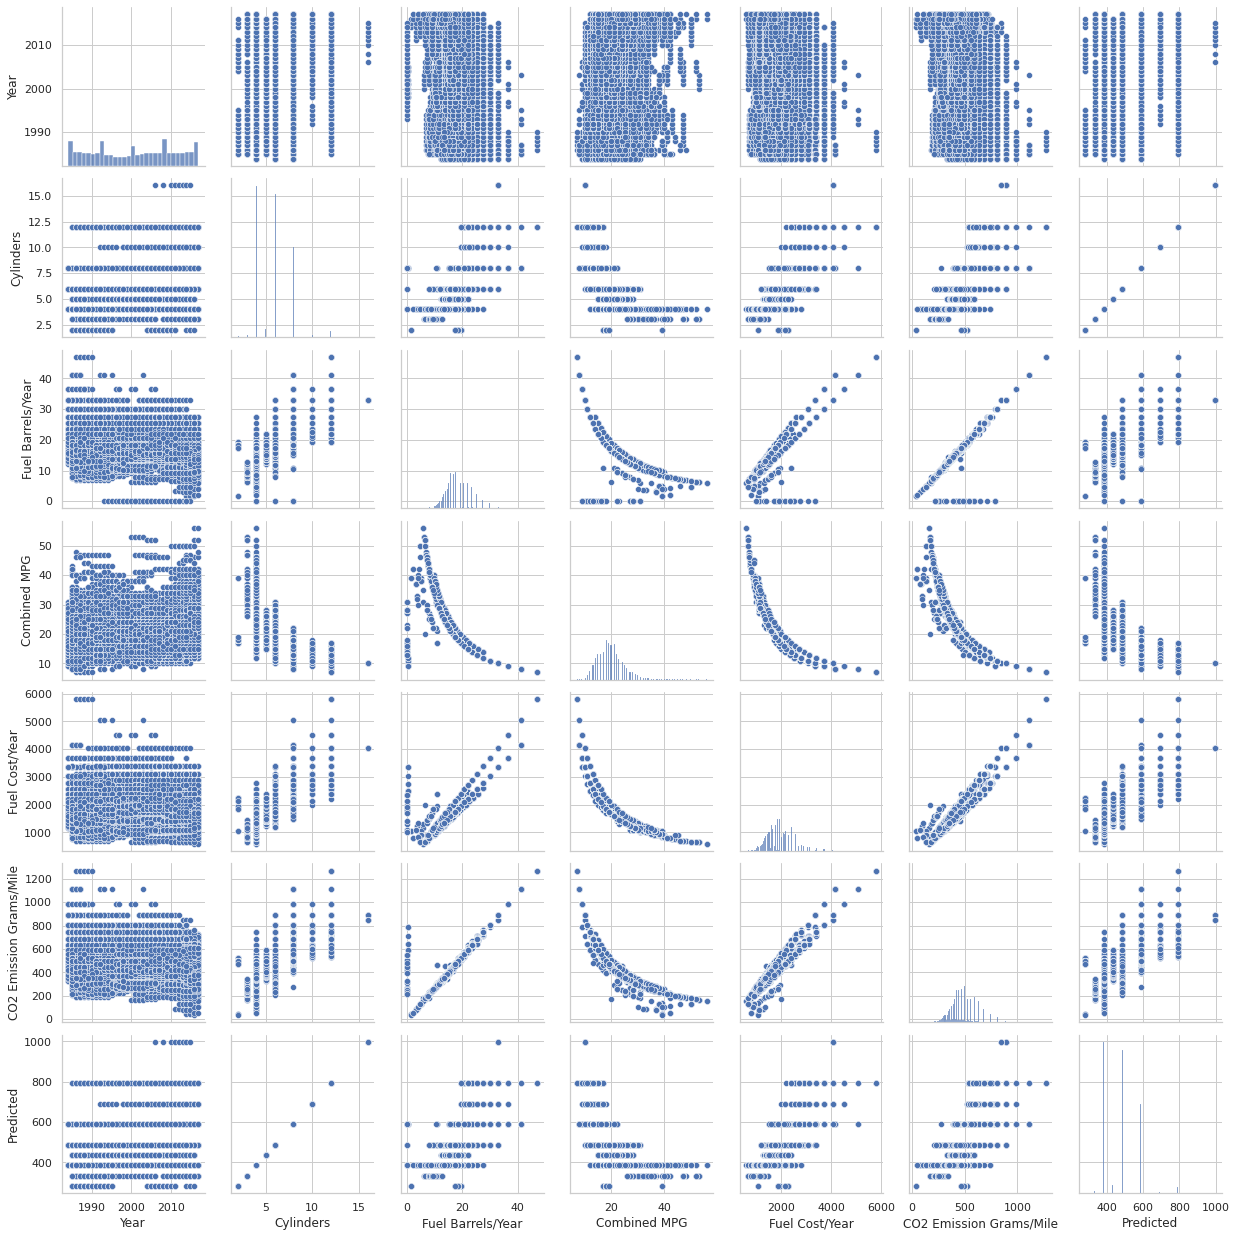

In [214]:
sns.pairplot(vehicles_1)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [343]:
people_attended = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'attended':[1, 2, 4, 4, 5, 7, 8, 13]})

In [345]:
people_attended.head()

,Invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

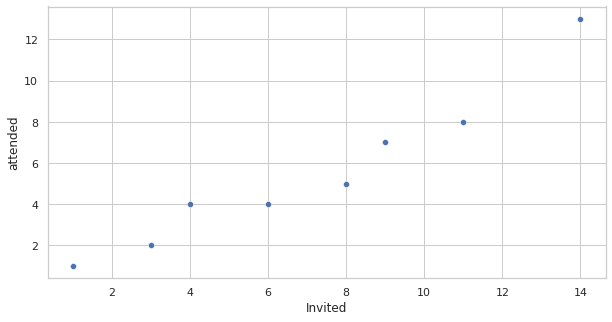

In [357]:
sns.scatterplot(x=people_attended["Invited"], y=people_attended["attended"])

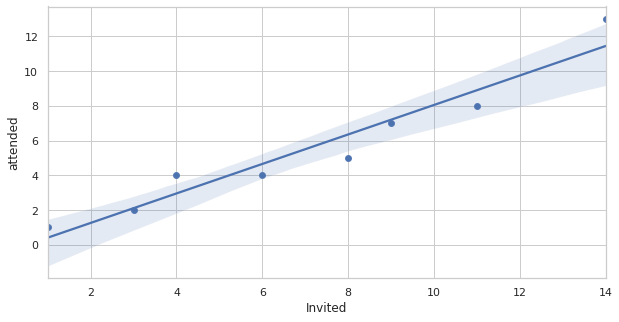

In [356]:
sns.regplot(x="Invited", y="attended", data=people_attended)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

- The graph shows a positive upward trend, it supports the initial hypothesis. But we must remember that the magnitude of the covariance is not easy to interpret because it is not normalized and therefore depends on the magnitudes of the variables.

In [347]:
lr = LinearRegression()

In [349]:
X_trainb = people_attended[['Invited']]
y_trainb = people_attended.attended

In [350]:
lr.fit(
    X = X_trainb,
    y = y_trainb,
)
optimal_m = lr.coef_[0]
optimal_n = lr.intercept_

In [351]:
people_attended["Predicted"] = lr.predict(X_trainb)

In [352]:
people_attended.head()

,Invited,attended,Predicted
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485


In [353]:
results = smf.ols("Invited ~ attended", data = people_attended).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Invited   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000102
Time:                        20:39:37   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [359]:
from sklearn.ensemble import IsolationForest

In [360]:
# identify outliers in the training dataset
model=IsolationForest(contamination=float(0.1))
model.fit(X_trainb)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [361]:
# Add column of scores and anomalies

# La biblioteca scikit-learn proporciona una implementación de Isolation Forest en la clase IsolationForest.
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html?highlight=isolationforest#sklearn.ensemble.IsolationForest


people_attended['scores']=model.decision_function(X_trainb)
people_attended['anomaly']=model.predict(X_trainb)
people_attended

,Invited,attended,Predicted,scores,anomaly
0,1,1,0.409091,0.013533,1
1,3,2,2.106061,0.129869,1
2,4,4,2.954545,0.144963,1
3,6,4,4.651515,0.119088,1
4,8,5,6.348485,0.149730,1
5,9,7,7.196970,0.156552,1
6,11,8,8.893939,0.105118,1
7,14,13,11.439394,-0.031577,-1


- A negative score value and a -1 for the value of anomaly columns indicate the presence of anomaly. A value of 1 for the anomaly represents the normal data.

In [368]:
# Delete rows with -1 value in 'anomaly' column
people_attended1 = people_attended.drop( people_attended[ people_attended['anomaly'] == -1 ].index , inplace=False)

In [369]:
people_attended1

,Invited,attended,Predicted,scores,anomaly
0,1,1,0.409091,0.013533,1
1,3,2,2.106061,0.129869,1
2,4,4,2.954545,0.144963,1
3,6,4,4.651515,0.119088,1
4,8,5,6.348485,0.149730,1
5,9,7,7.196970,0.156552,1
6,11,8,8.893939,0.105118,1


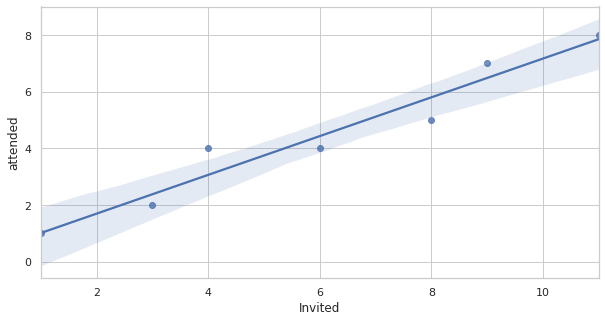

In [371]:
sns.regplot(x="Invited", y="attended", data=people_attended1)

- Eliminating the outliers it is observed that the line has less slope

In [380]:
results = smf.ols("Invited ~ attended", data = people_attended1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Invited   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000264
Time:                        22:09:40   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1061      0.755     -0.140      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

- Eliminating the outliers it is observed that the data related to std err and R-squared increases